<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading data

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-04-05 00:36:42--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-04-05 00:36:43 (13.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [22]:
# Processing Data

data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
y = data[:,1]

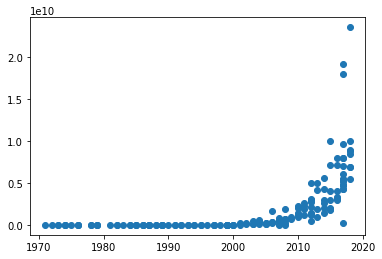

In [23]:
# Plotting data

plt.scatter(X,y)

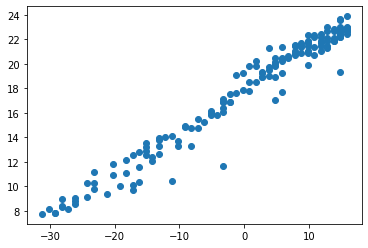

In [27]:
# Plotting scaled (x) and log(y) data

X = X - X.mean()
Y = np.log(y)

plt.scatter(X,Y)

In [31]:
# Constructing Model

rmodel = tf.keras.models.Sequential()

rmodel.add(tf.keras.layers.Dense(1, input_shape=(1,)))

rmodel.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# learning rate schduler
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
reg = rmodel.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 646.0745
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 377.0082
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 328.5690
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 238.2697
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 272.1168
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 135.4468
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 106.2365
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 110.9332
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 85.0326
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 57.7464
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 36.2577
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 23.2355
Epoch 13/200
6/6 [=======================

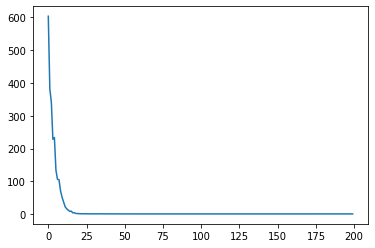

In [32]:
# Plot the loss

plt.plot(reg.history['loss'], label='loss')

In [34]:
# Getting slope of the reg line

print(rmodel.layers[0].get_weights())

[array([[0.35580584]], dtype=float32), array([17.757334], dtype=float32)]
